# Regression and Forcasting Analysis

In [2]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import statsmodels as smodels
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools
from sklearn.linear_model import Ridge, HuberRegressor, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:

path ='../Resources/Data/Price_Data/avn1_price.csv'
Price_DF = pd.read_csv(path)
Price_DF

,Date,PX_LAST,FUT_AGGTE_VOL
0,6/29/18,127.05,186.0
1,6/28/18,127.95,150.0
2,6/27/18,130.80,231.0
3,6/26/18,131.45,261.0
4,6/25/18,130.60,128.0
5,6/22/18,130.20,169.0
6,6/21/18,128.55,232.0
7,6/20/18,129.90,64.0
8,6/19/18,130.50,193.0
9,6/18/18,130.95,219.0


In [4]:
Price_DF.dtypes

Date              object
PX_LAST          float64
FUT_AGGTE_VOL    float64
dtype: object

In [5]:
Price_DF['Date'] = Price_DF['Date'].astype('datetime64')

In [6]:
Price_DF.dtypes
Price_DF.sort_values('Date',inplace=True)
Price_DF.reset_index(drop=True, inplace=True)

Price_DF

,Date,PX_LAST,FUT_AGGTE_VOL
0,2013-06-28,145.70,346.0
1,2013-07-01,146.10,335.0
2,2013-07-02,149.20,695.0
3,2013-07-03,146.10,532.0
4,2013-07-04,145.05,110.0
5,2013-07-05,145.45,483.0
6,2013-07-08,147.55,299.0
7,2013-07-10,145.15,425.0
8,2013-07-11,146.00,776.0
9,2013-07-12,142.60,626.0


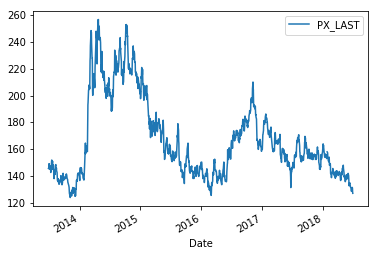

In [7]:
Price_DF.plot(x='Date', y='PX_LAST')
plt.savefig('coffee_price.png')
plt.show()

In [8]:
Price_DF.fillna(method='bfill', inplace=True)

In [9]:
Auto_Corr = []
lag = []
for i in range(60):
    lag.append(i)
    Auto_Corr.append(Price_DF.loc[:,'PX_LAST'].autocorr(i))

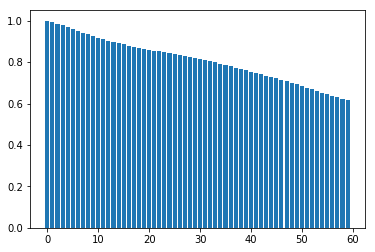

In [10]:
plt.bar(lag, Auto_Corr)
plt.show()

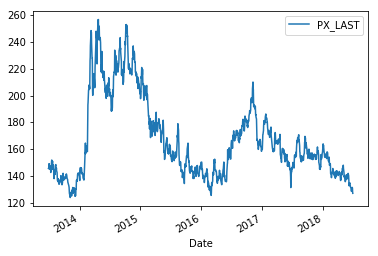

In [11]:
Price_DF.plot(x='Date', y='PX_LAST')

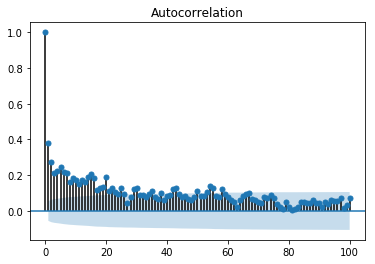

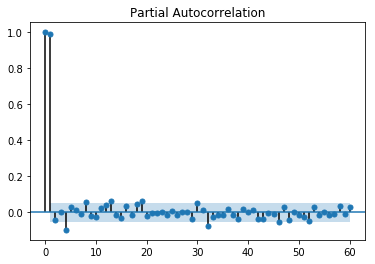

In [12]:
plot_acf(Price_DF.loc[:,'FUT_AGGTE_VOL'], lags=100)
plt.show()

plot_pacf(Price_DF.loc[:,'PX_LAST'], lags=60)
plt.show()

In [13]:
Diff_Price = Price_DF.loc[:,'PX_LAST'].diff()

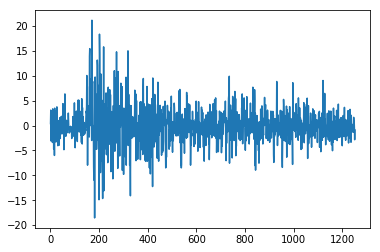

In [14]:
plt.plot(Diff_Price)
plt.show()

In [15]:
Diff_Price = Price_DF.loc[:,'PX_LAST'].apply(np.log).diff()

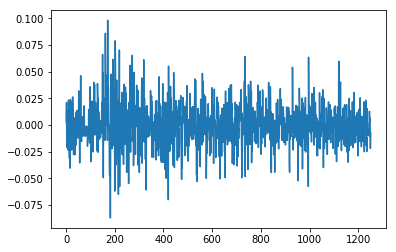

In [16]:
plt.plot(Diff_Price)
plt.show()

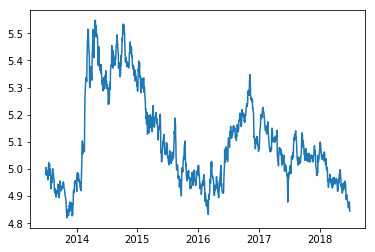

In [17]:
plt.plot(Price_DF.loc[:,'Date'], Price_DF.loc[:,'PX_LAST'].apply(np.log))
plt.show()

In [18]:
Price_t = Price_DF.loc[0:1250,'PX_LAST']
Price_t_k = Price_DF.loc[1:1251,'PX_LAST']
print(len(Price_t))
print(len(Price_t_k))

1251
1251


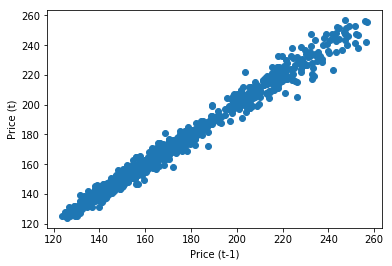

In [19]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-1)')
plt.ylabel('Price (t)')
plt.show()

In [20]:
Price_t = Price_DF.iloc[30:,1]
Price_t_k = Price_DF.iloc[:-30,1]
print(len(Price_t))
print(len(Price_t_k))

1222
1222


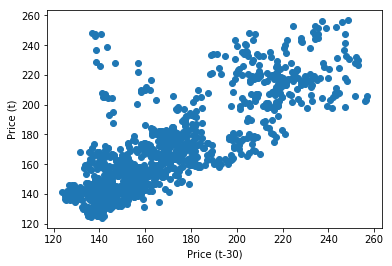

In [21]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-30)')
plt.ylabel('Price (t)')
plt.show()

In [22]:
Price_t = Price_DF.iloc[60:, 1]
Price_t_k = Price_DF.iloc[:-60, 1]
print(len(Price_t))
print(len(Price_t_k))

1192
1192


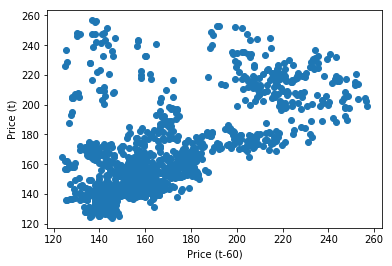

In [23]:
plt.scatter(Price_t_k, Price_t)
plt.xlabel('Price (t-60)')
plt.ylabel('Price (t)')
plt.show()


In [24]:
Price_DF.set_index('Date', inplace=True)

In [25]:
Price = Price_DF['PX_LAST'].to_frame()

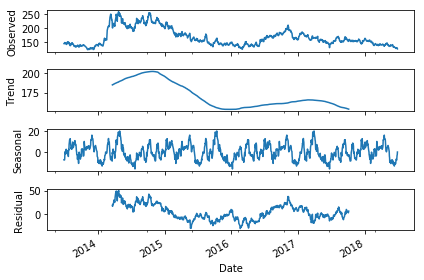

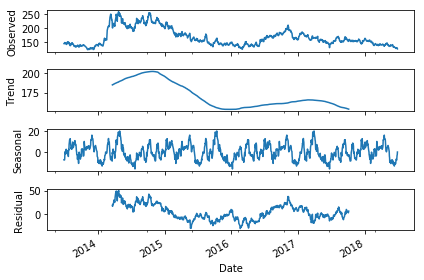

In [26]:
result = seasonal_decompose(Price, freq=365, model='additive')
result.plot()


/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:        D.FUT_AGGTE_VOL   No. Observations:                 1251
Model:                ARIMA(10, 1, 1)   Log Likelihood               -9089.497
Method:                       css-mle   S.D. of innovations            345.372
Date:                Mon, 09 Jul 2018   AIC                          18204.994
Time:                        21:03:54   BIC                          18271.706
Sample:                    07-01-2013   HQIC                         18230.072
                         - 06-29-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3148      0.067     -4.681      0.000      -0.447      -0.183
ar.L1.D.FUT_AGGTE_VOL      0.2578      0.028      9.118      0.000       0.202       0.313
ar.L

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


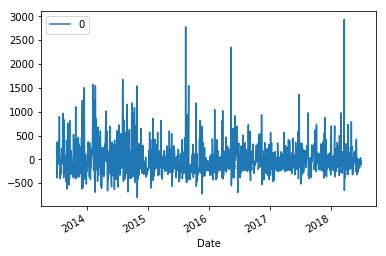

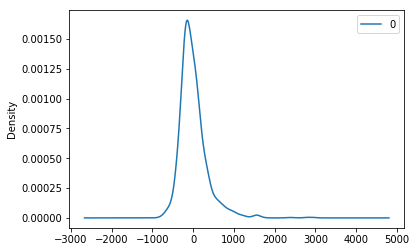

                 0
count  1251.000000
mean      4.680862
std     346.251728
min    -798.109210
25%    -200.936592
50%     -63.000700
75%     124.473108
max    2935.944774


In [27]:

model = ARIMA(Price_DF.iloc[:,1], order=(10,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [28]:

X = Price_DF.iloc[:,0].values

size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(10,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)

len(forecast)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of th

3

Test MSE: 507.068


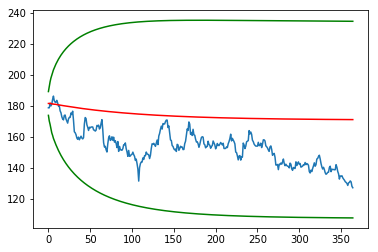

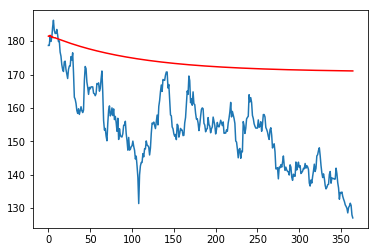

In [29]:
error = mean_squared_error(test, forecast[0])
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(forecast[0], color='red')
plt.plot(forecast[2], color='green')
plt.show()

plt.plot(test)
plt.plot(forecast[0], color='red')
plt.show()

In [30]:
path = '../Resources/Data/Weather_data/'
files = ['weather_data_Jakarta_2013_2018.csv',
         'weather_data_Nha Trang,vietnam_2013_2018.csv',
         'weather_data_Sao Paulo_2013_2018.csv',
         'weather_data_Awasa_2013_2018.csv'
        ]
cities = ['Jakarta', 'Nha_Trang', 'Sao_Paulo', 'Awasa']
Weather_DF = pd.read_csv(path+'weather_data_Cali_2013_2018.csv')
Weather_DF['Date'] = Weather_DF['Date'].astype('datetime64')
Weather_DF.set_index('Date', inplace=True)
Weather_DF.drop(columns='Unnamed: 0', inplace=True)
Weather_DF.rename(columns={'Max Temperature C': 'MaxT_Cali',
                           'Min Temperature C': 'MinT_Cali',
                           'Precipitation Total': 'Precip_Cali',
                           'Humidity Avg': 'Humid_Cali'
                          },
                  inplace=True
                 )

for i in range(len(files)):
    aDF = pd.read_csv(path+files[i])
    
    aDF['Date'] = aDF['Date'].astype('datetime64')
    aDF.set_index('Date', inplace=True)
    aDF.drop(columns='Unnamed: 0', inplace=True)
    aDF.rename(columns={'Max Temperature C': 'MaxT_'+cities[i],
                       'Min Temperature C': 'MinT_'+cities[i],
                       'Precipitation Total': 'Precip_'+cities[i],
                       'Humidity Avg': 'Humid_'+cities[i]
                       },
              inplace=True
             )
    
    Weather_DF = Weather_DF.merge(aDF, left_index=True, right_index=True)

Weather_DF.head()

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,Precip_Nha_Trang,Humid_Nha_Trang,MaxT_Sao_Paulo,MinT_Sao_Paulo,Precip_Sao_Paulo,Humid_Sao_Paulo,MaxT_Awasa,MinT_Awasa,Precip_Awasa,Humid_Awasa
Date,,,,,,,,,,,,,,,,,,,,
2013-01-01,29,16,1.2,81.875,31,27,1.8,75.875,26,22,0.8,82.250,28,20,2.2,87.250,26,8,0.0,39.750
2013-01-02,29,15,1.3,79.750,32,25,5.7,79.625,27,23,0.3,81.125,22,18,15.2,97.375,26,8,0.0,35.625
2013-01-03,29,17,0.9,82.750,33,25,5.2,80.625,26,22,2.9,86.625,21,18,3.8,96.500,26,7,0.0,40.625
2013-01-04,30,16,0.7,80.750,33,26,16.4,78.250,27,23,1.7,81.875,24,19,2.4,94.625,27,8,0.0,54.750
2013-01-05,30,16,2.0,81.125,31,26,31.8,82.875,26,23,12.1,84.500,29,20,7.5,88.000,26,9,0.0,52.125


In [31]:
path = '../Resources/Data/Production_Data/Trade_Data.csv'
Trade_DF = pd.read_csv(path)
Trade_DF.set_index('Dates', inplace=True)
Trade_DF.head()

,Import,Export,Production,Trade Balance
Dates,,,,
2013-05-01,650.000000,11487.000000,11615.000000,10837.000000
2013-05-02,647.704918,11743.327869,12008.114754,11095.622951
2013-05-03,645.409836,11999.655738,12401.229508,11354.245902
2013-05-04,643.114754,12255.983607,12794.344262,11612.868852
2013-05-05,640.819672,12512.311475,13187.459016,11871.491803


In [32]:
path = '../Resources/Data/Production_Data/Trade_Market_year_Data.csv'
MY_Trade_DF = pd.read_csv(path)
MY_Trade_DF.set_index('Dates', inplace=True)
MY_Trade_DF = MY_Trade_DF.rename(columns={'Import': 'Import MY', 'Export': 'Export MY', 'Production': 'Production MY'})
MY_Trade_DF.head()

,Import MY,Export MY,Production MY
Dates,,,
2013-06-01,29855.000000,59138.000000,79129.000000
2013-06-02,29704.109290,59058.338798,78762.874317
2013-06-03,29553.218579,58978.677596,78396.748634
2013-06-04,29402.327869,58899.016393,78030.622951
2013-06-05,29251.437158,58819.355191,77664.497268


In [33]:
Combined_DF = Weather_DF.merge(Price_DF, left_index=True, right_index=True)
Combined_DF = Combined_DF.merge(Trade_DF, left_index=True, right_index=True)
Combined_DF = Combined_DF.merge(MY_Trade_DF, left_index=True, right_index=True)

In [34]:
Combined_DF 
#= Combined_DF.filter(regex='^P', axis='columns')


,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,...,Humid_Awasa,PX_LAST,FUT_AGGTE_VOL,Import,Export,Production,Trade Balance,Import MY,Export MY,Production MY
2013-06-28,28,18,3.6,84.500,34,24,11.2,76.250,36,24,...,85.750,145.70,346.0,516.885246,26354.016393,34415.655738,25837.131148,25780.950820,56987.147541,69243.606557
2013-07-01,29,18,1.2,81.250,34,25,6.5,76.125,34,25,...,85.500,146.10,335.0,510.000000,27123.000000,35595.000000,26613.000000,25328.278689,56748.163934,68145.229508
2013-07-02,30,17,0.8,79.125,34,25,10.5,75.125,33,25,...,85.875,149.20,695.0,559.891304,27763.141304,35561.793478,27203.250000,25177.387978,56668.502732,67779.103825
2013-07-03,29,17,1.1,80.000,31,26,8.5,81.000,33,25,...,85.375,146.10,532.0,609.782609,28403.282609,35528.586957,27793.500000,25026.497268,56588.841530,67412.978142
2013-07-04,29,17,1.0,82.750,30,25,7.3,81.375,33,25,...,82.875,145.05,110.0,659.673913,29043.423913,35495.380435,28383.750000,24875.606557,56509.180328,67046.852459
2013-07-05,30,15,0.8,77.875,30,25,17.1,81.375,34,25,...,82.875,145.45,483.0,709.565217,29683.565217,35462.173913,28974.000000,24724.715847,56429.519126,66680.726776
2013-07-08,32,17,0.6,75.000,35,24,0.2,73.125,33,24,...,85.125,147.55,299.0,859.239130,31603.989130,35362.554348,30744.750000,24272.043716,56190.535519,65582.349727
2013-07-10,30,16,2.0,74.000,32,25,13.9,79.875,32,25,...,88.125,145.15,425.0,959.021739,32884.271739,35296.141304,31925.250000,23970.262295,56031.213115,64850.098361
2013-07-11,29,16,1.8,82.125,33,24,2.5,76.250,33,25,...,85.000,146.00,776.0,1008.913043,33524.413043,35262.934783,32515.500000,23819.371585,55951.551913,64483.972678
2013-07-12,30,17,1.2,80.125,34,24,8.5,76.625,36,24,...,85.000,142.60,626.0,1058.804348,34164.554348,35229.728261,33105.750000,23668.480874,55871.890710,64117.846995


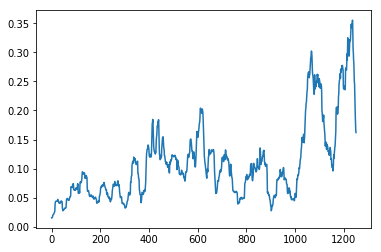

In [35]:
N=30
x = Combined_DF.loc[:,'Precip_Cali'] / Combined_DF.loc[:,'Precip_Cali'].max()
y1 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(y1)
plt.show()

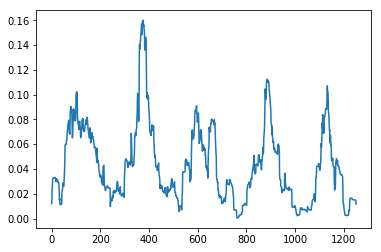

In [36]:
N=30
x = Combined_DF.loc[:,'Precip_Sao_Paulo'] / Combined_DF.loc[:,'Precip_Sao_Paulo'].max()
y2 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(y2)
plt.show()

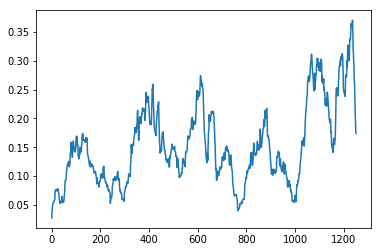

In [37]:
y = y1 + y2
plt.plot(y)
plt.show()

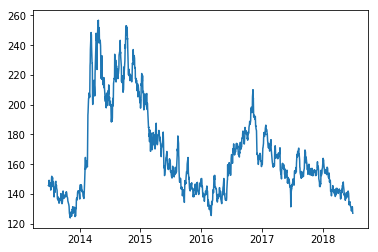

In [38]:
plt.plot(Combined_DF['PX_LAST'])
plt.show()
plt.savefig('price.png')

In [39]:
Combined_DF.iloc[:,:].shape

(1251, 29)

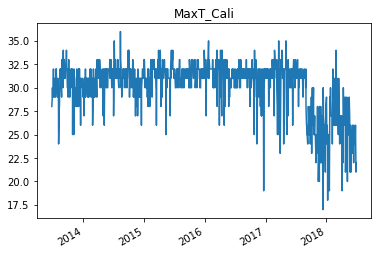

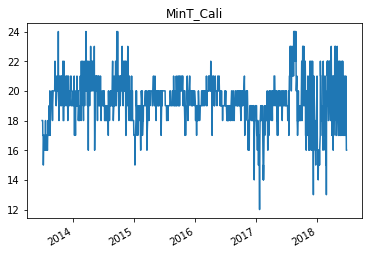

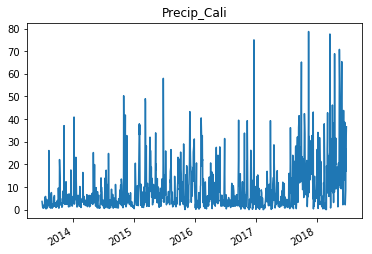

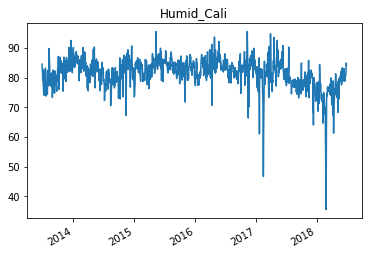

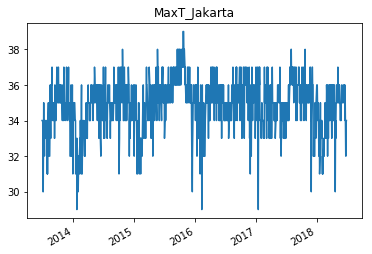

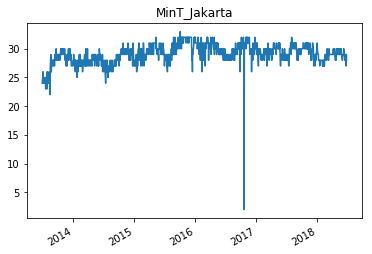

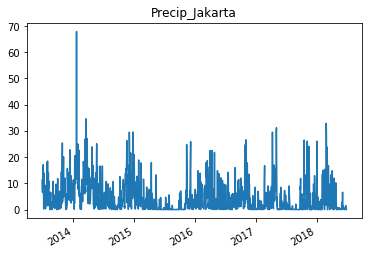

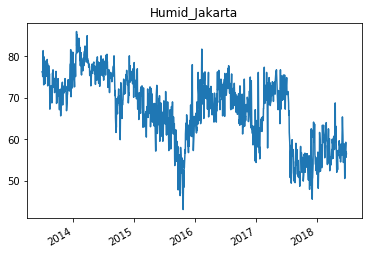

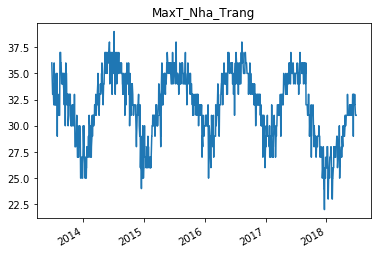

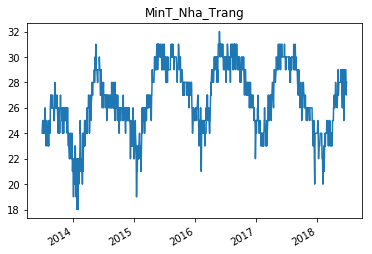

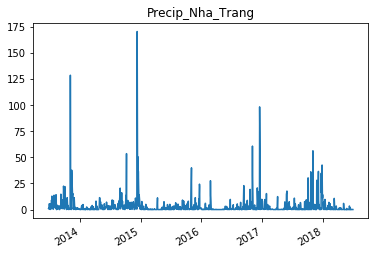

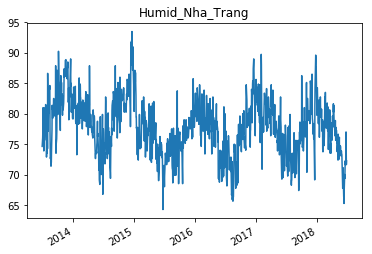

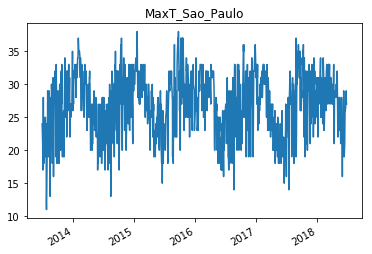

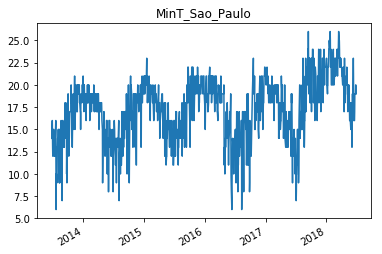

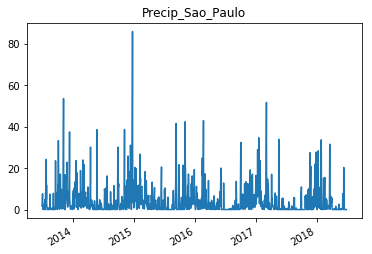

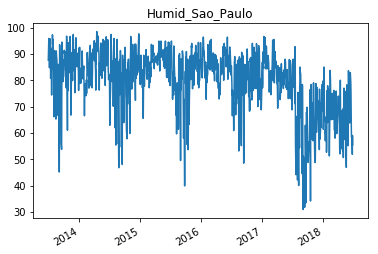

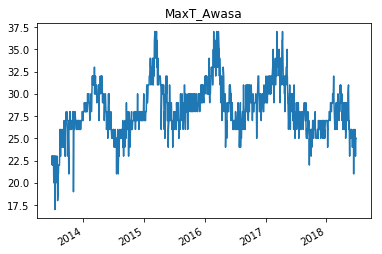

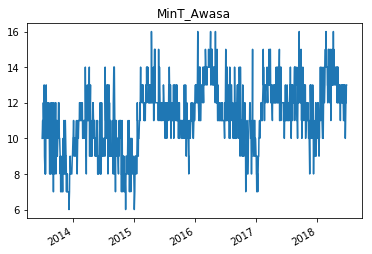

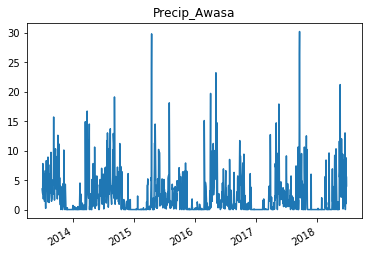

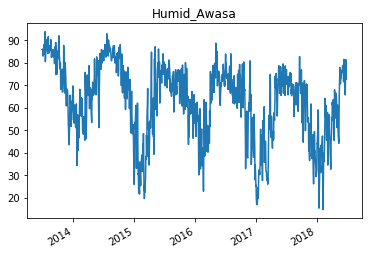

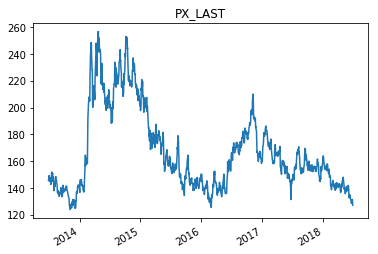

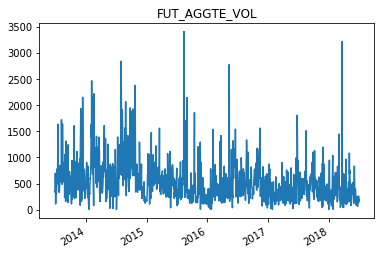

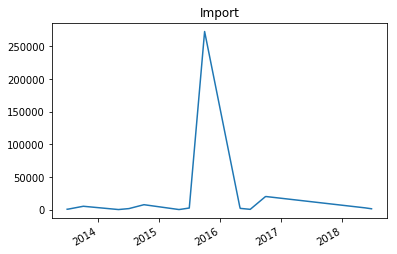

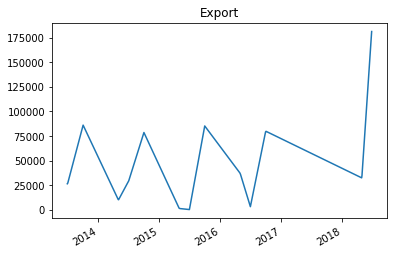

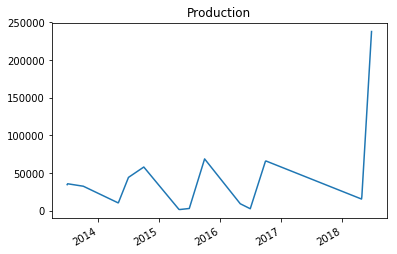

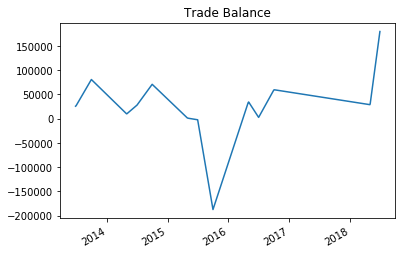

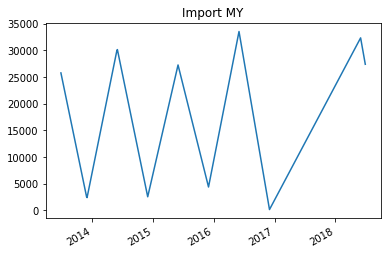

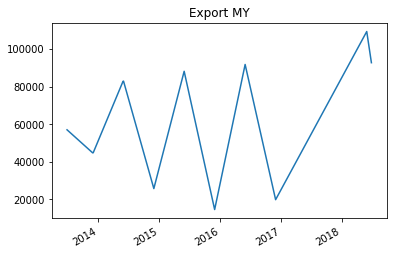

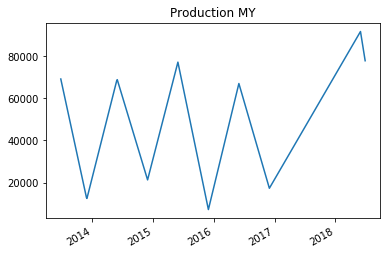

In [40]:
columns = Combined_DF.columns.values
index = Combined_DF.index.values
for column in columns:
    Combined_DF[column].plot()
    plt.title(column)
    plt.show()

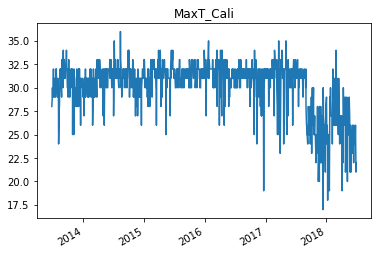

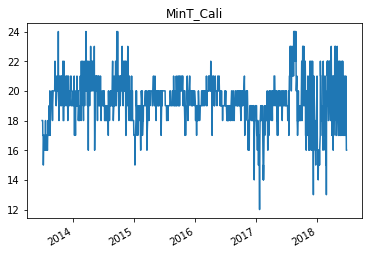

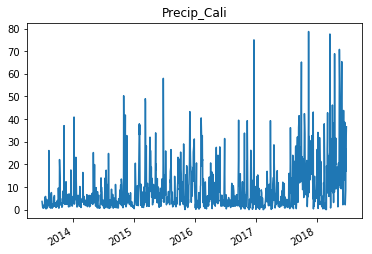

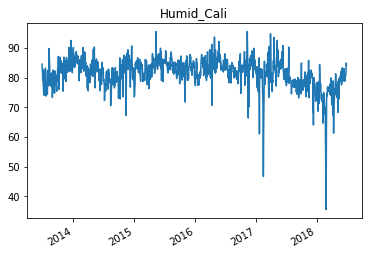

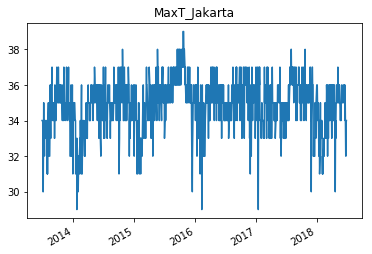

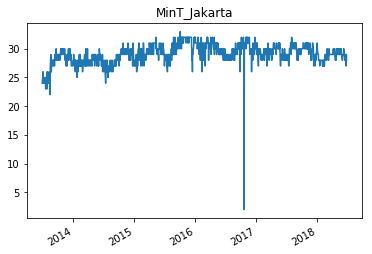

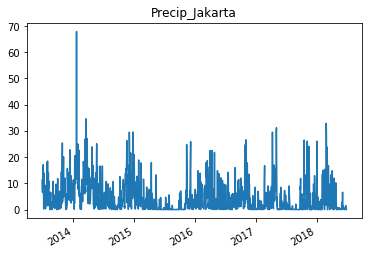

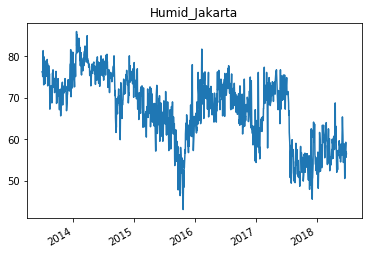

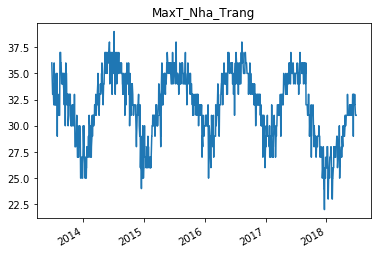

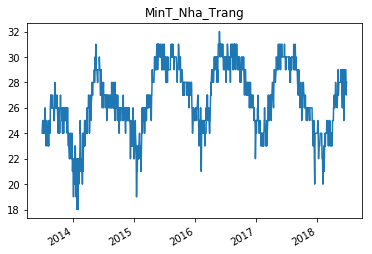

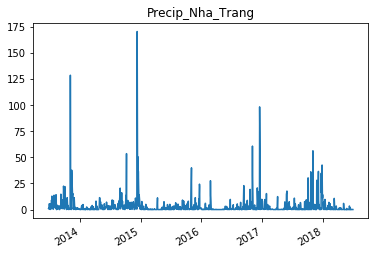

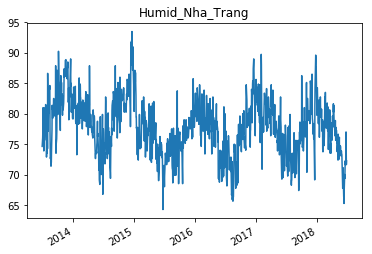

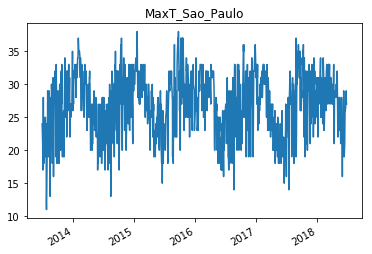

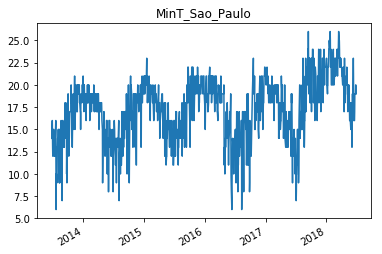

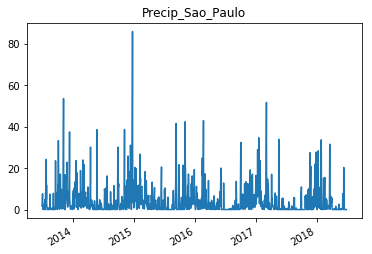

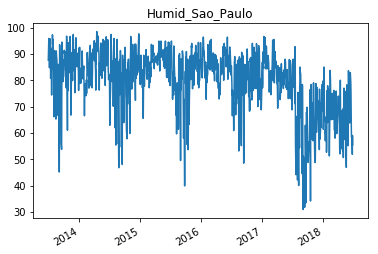

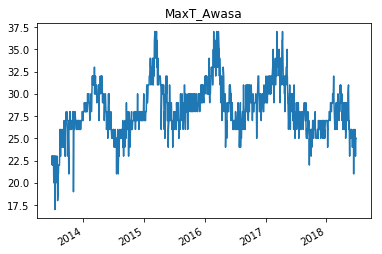

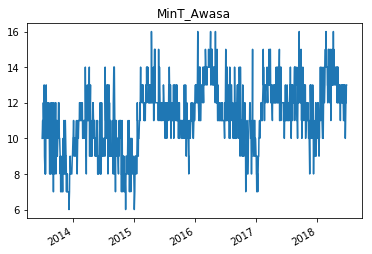

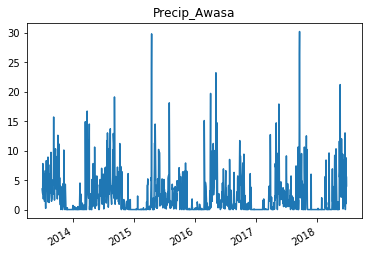

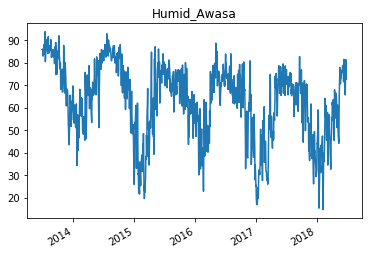

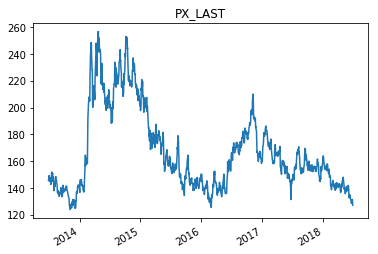

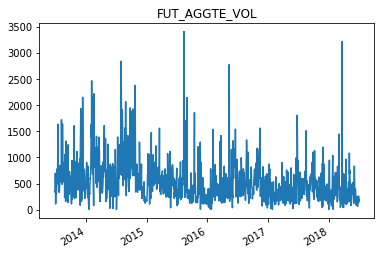

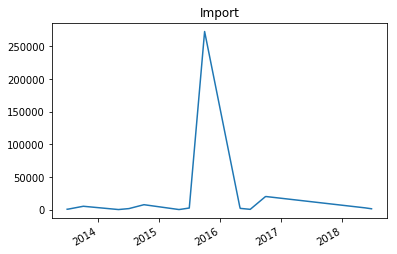

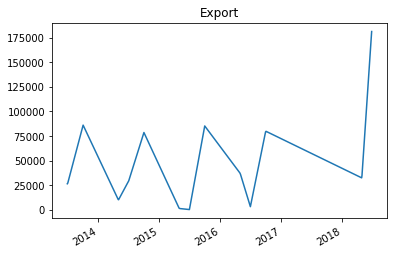

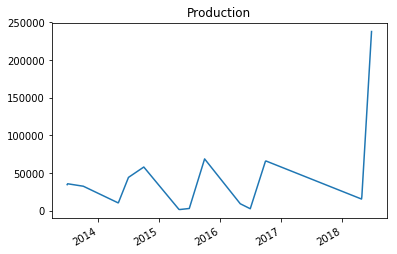

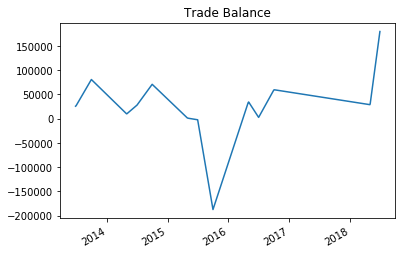

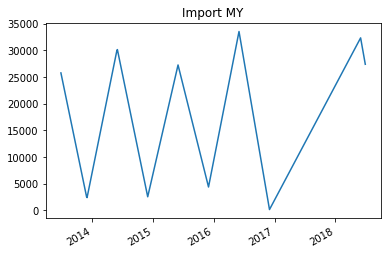

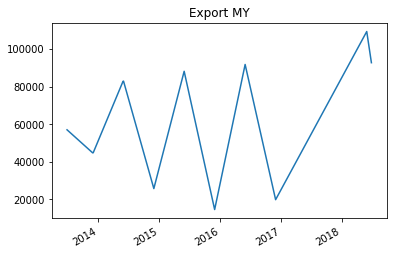

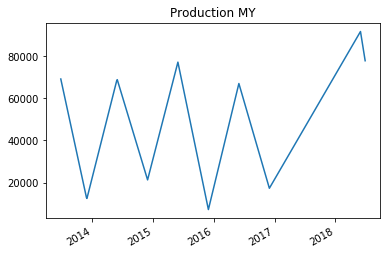

In [41]:
columns = Combined_DF.columns.values
index = Combined_DF.index.values
for column in columns:
    Combined_DF[column].plot()
    plt.title(column)
    plt.show()

In [42]:
Combined_DF.iloc[-40:,23] = np.ones((40)) * Combined_DF.iloc[:-40,23].mean()
Combined_DF.iloc[-40:,24] = np.ones((40)) * Combined_DF.iloc[:-40,24].mean()
Combined_DF.iloc[-40:,25] = np.ones((40)) * Combined_DF.iloc[:-40,25].mean()

In [43]:
features = np.ones(Combined_DF.iloc[:,:-2].shape)
print(features)
#length = len(Combined_DF)
#features = np.empty(Combined_DF.iloc[:,0:3].shape)
for i in range(3,20):
    N=45
    x = Combined_DF.iloc[:,i].values
    features[:,i] = np.convolve(x, np.ones((N,))/N, mode='same')


features[:,20] = Combined_DF.loc[:,'Import'].values
features[:,21] = Combined_DF.loc[:,'Export'].values
features[:,22] = Combined_DF.loc[:,'Production'].values
features[:,23] = Combined_DF.loc[:,'Trade Balance'].values
features[:,24] = Combined_DF.loc[:,'Import MY'].values
features[:,25] = Combined_DF.loc[:,'Export MY'].values
features[:,26] = Combined_DF.loc[:,'Production MY'].values
target = Combined_DF.loc[:, 'PX_LAST'].values
print(features)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.57809508e+04
  5.69871475e+04 6.92436066e+04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.53282787e+04
  5.67481639e+04 6.81452295e+04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.51773880e+04
  5.66685027e+04 6.77791038e+04]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.77598306e+04
  9.38377268e+04 7.89217814e+04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.75830164e+04
  9.32456393e+04 7.84253115e+04]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.74062022e+04
  9.26535519e+04 7.79288415e+04]]


In [44]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
T = len(features_standardized)-365
FS_train, FS_test = features_standardized[:T,:], features_standardized[T:,:]
T_train, T_test = target[:T], target[T:]
FS_train = FS_train[:]
FS_test = FS_test[:]
T_train = T_train[:]
T_test = T_test[:]
regression1 = RidgeCV(alphas=[0.1,0.5,1.0,2.0,3.0,5.0,10.0])
regression2 = Lasso(alpha=1.8)
regression3 = HuberRegressor(epsilon=2, alpha=.5)
model1 = regression1.fit(FS_train, T_train)
model2 = regression2.fit(FS_train, T_train)
model3 = regression3.fit(FS_train, T_train)
model1.alpha_

0.1

In [45]:
coef = model1.coef_
pred_list = Combined_DF.columns.values[:].tolist()
pred_list.pop(20)
pred_list.pop(20)
predictors = pred_list 
pred_coef1_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef1_df

,Predictors,Coeficients
0,MaxT_Cali,0.000000
1,MinT_Cali,0.000000
2,Precip_Cali,0.000000
3,Humid_Cali,-30.982069
4,MaxT_Jakarta,-33.013209
5,MinT_Jakarta,-5.711366
6,Precip_Jakarta,-7.258392
7,Humid_Jakarta,21.352505
8,MaxT_Nha_Trang,-24.800230
9,MinT_Nha_Trang,48.813683


In [46]:
coef = model2.coef_
pred_list = Combined_DF.columns.values[:].tolist()
pred_list.pop(20)
pred_list.pop(20)
predictors = pred_list  
pred_coef2_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef2_df

,Predictors,Coeficients
0,MaxT_Cali,0.000000
1,MinT_Cali,0.000000
2,Precip_Cali,0.000000
3,Humid_Cali,-0.000000
4,MaxT_Jakarta,0.000000
5,MinT_Jakarta,0.000000
6,Precip_Jakarta,1.592371
7,Humid_Jakarta,6.874224
8,MaxT_Nha_Trang,0.000000
9,MinT_Nha_Trang,0.000000


In [47]:
coef = model3.coef_
pred_list = Combined_DF.columns.values[:].tolist()
pred_list.pop(20)
pred_list.pop(20)
predictors = pred_list 
pred_coef3_df = pd.DataFrame({'Predictors': predictors, 'Coeficients': coef})
pred_coef3_df

,Predictors,Coeficients
0,MaxT_Cali,0.000000
1,MinT_Cali,0.000000
2,Precip_Cali,0.000000
3,Humid_Cali,-27.313751
4,MaxT_Jakarta,-17.827192
5,MinT_Jakarta,4.643895
6,Precip_Jakarta,-0.896797
7,Humid_Jakarta,13.058656
8,MaxT_Nha_Trang,2.852934
9,MinT_Nha_Trang,18.409629


In [48]:
print(model1.score(FS_train, T_train))
print(model2.score(FS_train, T_train))
print(model3.score(FS_train, T_train))
print(model1.score(FS_test, T_test))
print(model2.score(FS_test, T_test))
print(model3.score(FS_test, T_test))

0.9048093037218623
0.6830253809101818
0.8871509287684236
-3.4397844652675107
0.3708025047727887
-1.341442204165582


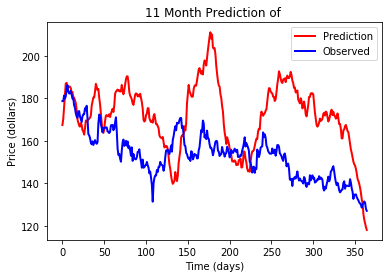

619.4180863040532
21.061296046932686


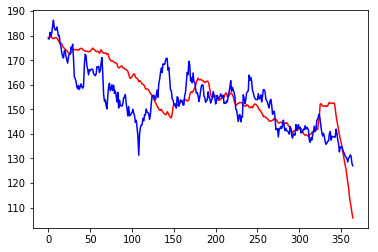

87.78270914947672
7.165493030725052


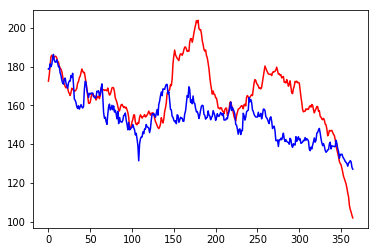

326.66713004690916
13.914536570439187


In [49]:
Index = Combined_DF.index.astype(str)
pr1 = model1.predict(FS_test)
plt.plot(pr1, color='red', linewidth=2, label='Prediction')
plt.plot(T_test, color='blue', linewidth=2, label='Observed')
plt.title('11 Month Prediction of ')
plt.xlabel('Time (days)')
plt.ylabel('Price (dollars)')
plt.legend()
plt.show()
error = mean_squared_error(T_test, pr1)
error_A = mean_absolute_error(T_test, pr1)
print(error)
print(error_A)
pr2 = model2.predict(FS_test)
plt.plot(pr2, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr2)
error_A = mean_absolute_error(T_test, pr2)
print(error)
print(error_A)
pr3 = model3.predict(FS_test)
plt.plot(pr3, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr3)
error_A = mean_absolute_error(T_test, pr3)
print(error)
print(error_A)

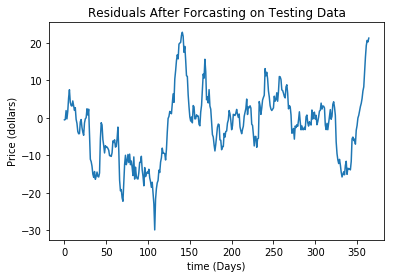

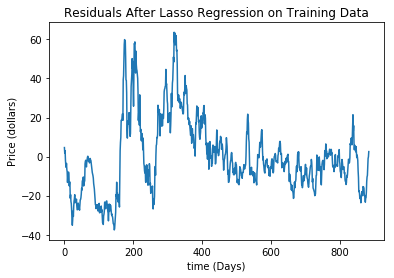

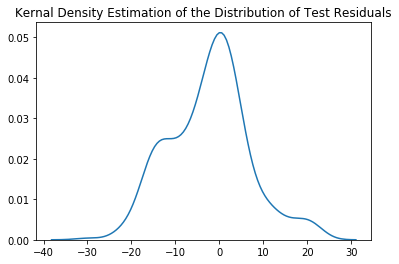

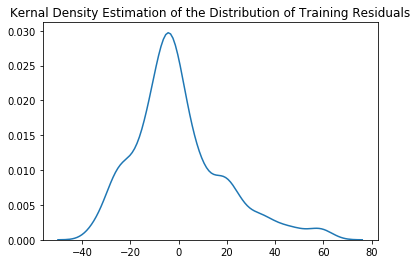

In [50]:
residuals_test = T_test - pr2
pr = model2.predict(FS_train)
residuals_train = T_train - pr
plt.plot(residuals_test)
plt.xlabel('time (Days)')
plt.ylabel('Price (dollars)')
plt.title('Residuals After Forcasting on Testing Data')
#plt.savefig('test_res.png')
plt.show()
plt.plot(residuals_train)
plt.xlabel('time (Days)')
plt.ylabel('Price (dollars)')
plt.title('Residuals After Lasso Regression on Training Data')
#plt.savefig('train_res.png')
plt.show()
sns.kdeplot(residuals_test)
plt.title('Kernal Density Estimation of the Distribution of Test Residuals')
#plt.savefig('KDE_Test.png')
plt.show()
sns.kdeplot(residuals_train)
plt.title('Kernal Density Estimation of the Distribution of Training Residuals')
#plt.savefig('KDE_Train.png')
plt.show()

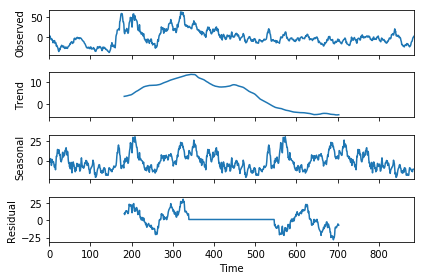

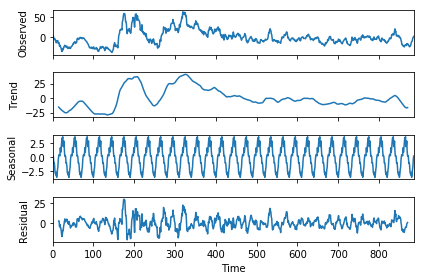

In [51]:
result1 = seasonal_decompose(residuals_train, freq=365, model='additive')
result1.plot()
plt.show()
result2 = seasonal_decompose(residuals_train, freq=30, model='additive')
result2.plot()
plt.show()
trend = result2.trend
seasonal = result2.seasonal 
residual = result2.resid 

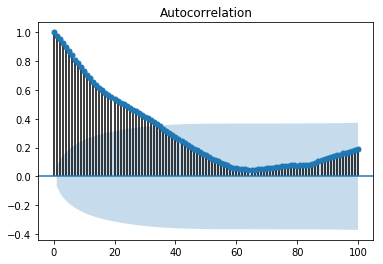

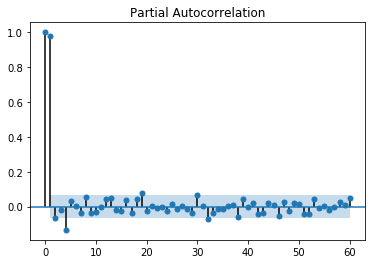

In [52]:
plot_acf(residuals_train, lags=100)
plt.show()

plot_pacf(residuals_train, lags=60)
plt.show()

In [53]:
X = residuals_train

size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(residuals_train, order=(10,1,2))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)
forecast_trend = forecast[0] + seasonal[:365]
len(forecast_trend)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


365

Test MSE: 326.667


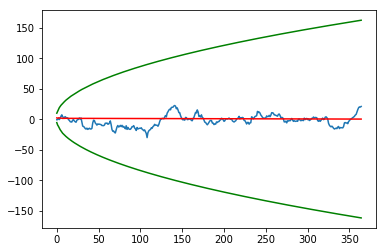

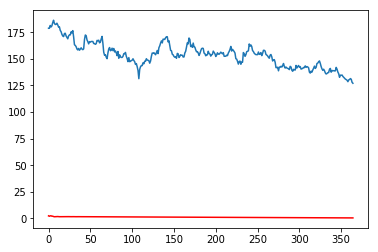

In [54]:
#error = mean_squared_error(residuals_test, forecast[0])
print('Test MSE: %.3f' % error)
# plot
plt.plot(residuals_test)
plt.plot(forecast[0], color='red')
plt.plot(forecast[2], color='green')
plt.savefig('arima1.png')
plt.show()

plt.plot(T_test)
plt.plot(forecast[0], color='red')
plt.show()

886


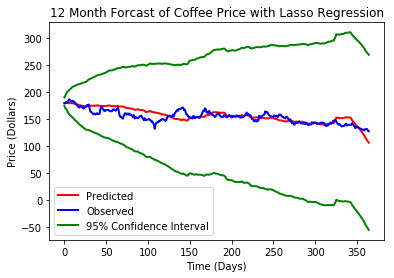

87.78270914947672
7.165493030725052


In [55]:
pr = model2.predict(FS_test)
print(len(seasonal))

plt.plot(pr, color='red', linewidth=2, label='Predicted')
plt.plot(T_test, color='blue', linewidth=2, label='Observed')
x1 = pr + forecast[2][:,0]
x2 = pr + forecast[2][:,1]
x = (x1,x2)
plt.plot(x1, color='g', linewidth=2, label='95% Confidence Interval')
plt.plot(x2, color='g', linewidth=2)
plt.xlabel('Time (Days)')
plt.ylabel('Price (Dollars)')
plt.title('12 Month Forcast of Coffee Price with Lasso Regression')
plt.legend()
#plt.savefig('Lasso_with_Error.png')
plt.show()
error = mean_squared_error(T_test, pr)
error_A = mean_absolute_error(T_test, pr)
print(error)
print(error_A)

In [89]:
features = np.ones(Combined_DF.iloc[-365:,:-2].shape)
print(features)
#length = len(Combined_DF)
#features = np.empty(Combined_DF.iloc[:,0:3].shape)
for i in range(3,20):
    N=30
    result = seasonal_decompose(Combined_DF.iloc[-730:,i], freq=365, model='additive')
    seasonal_export = result.seasonal.values
    x = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
    x = x - .25*x
    features[:,i] = np.convolve(x, np.ones((N,))/N, mode='same')

result = seasonal_decompose(Combined_DF.iloc[-730:,22], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,20] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,23], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,21] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:])) + .25 * seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,24], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,22] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:])) + .25 * seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,25], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,23] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,26], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,24] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,27], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,25] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))
result = seasonal_decompose(Combined_DF.iloc[-730:,28], freq=365, model='additive')
seasonal_export = result.seasonal.values
features[:,26] = seasonal_export[-365:] + np.abs(min(seasonal_export[-365:]))

print(features)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.10120550e+03
  6.99757242e+03 5.12234994e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.30378412e+03
  7.50477632e+03 5.52003062e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.38855680e+03
  7.68497992e+03 5.64490353e+03]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.85058130e+03
  6.46640872e+03 4.75469441e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.93326509e+03
  6.64121724e+03 4.87552562e+03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.01666094e+03
  6.81788699e+03 4.99777831e+03]]


In [90]:
scaler = StandardScaler()
features_stand_predict = scaler.fit_transform(features)
forecast_next_year = model2.predict(features_stand_predict)
pr = model2.predict(features_standardized)
residuals_train = target - pr
#r_squared = model2.score(target.reshape(-1, 1), pr.reshape(-1, 1))
mse = mean_squared_error(target, pr)
mae = mean_absolute_error(target, pr)
print('Mean Squared Error = ' + str(mse))
print('Mean Absolute Error = ' + str(mae))

Mean Squared Error = 314.4049053028502
Mean Absolute Error = 13.827804959762188


In [91]:
X = residuals_train

size = int(len(X)-365)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(residuals_train, order=(10,0,2))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(train)-10
end_index = start_index + 30
forecast = model_fit.forecast(steps=365)
forecast_trend = forecast[0] 
len(forecast_trend)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of th

365

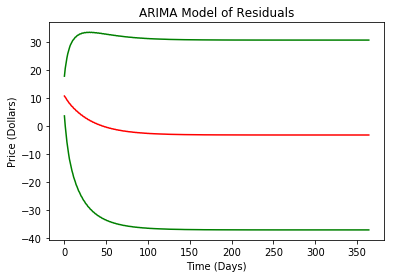

In [92]:
plt.plot(forecast[0], color='red')
plt.plot(forecast[2], color='green')
plt.title('ARIMA Model of Residuals')
plt.xlabel('Time (Days)')
plt.ylabel('Price (Dollars)')
#plt.savefig('arima2.png')
plt.show()

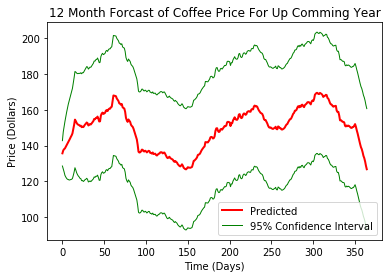

In [94]:
origin_diff = forecast_next_year[1] - target[-1]
plt.plot(forecast_next_year + forecast[0] - origin_diff, color='red', linewidth=2, label='Predicted')

x1 = forecast_next_year + forecast[2][:,0] - origin_diff
x2 = forecast_next_year + forecast[2][:,1] - origin_diff
x = (x1,x2)
plt.plot(x1, color='g', linewidth=1, label='95% Confidence Interval')
plt.plot(x2, color='g', linewidth=1)
plt.xlabel('Time (Days)')
plt.ylabel('Price (Dollars)')
plt.title('12 Month Forcast of Coffee Price For Up Comming Year')
plt.legend()
plt.savefig('Forcast_Price.png')
plt.show()

In [61]:
Combined_DF.fillna(method='ffill')

Combined_DF.head()

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,...,Humid_Awasa,PX_LAST,FUT_AGGTE_VOL,Import,Export,Production,Trade Balance,Import MY,Export MY,Production MY
2013-06-28,28,18,3.6,84.500,34,24,11.2,76.250,36,24,...,85.750,145.70,346.0,516.885246,26354.016393,34415.655738,25837.131148,25780.950820,56987.147541,69243.606557
2013-07-01,29,18,1.2,81.250,34,25,6.5,76.125,34,25,...,85.500,146.10,335.0,510.000000,27123.000000,35595.000000,26613.000000,25328.278689,56748.163934,68145.229508
2013-07-02,30,17,0.8,79.125,34,25,10.5,75.125,33,25,...,85.875,149.20,695.0,559.891304,27763.141304,35561.793478,27203.250000,25177.387978,56668.502732,67779.103825
2013-07-03,29,17,1.1,80.000,31,26,8.5,81.000,33,25,...,85.375,146.10,532.0,609.782609,28403.282609,35528.586957,27793.500000,25026.497268,56588.841530,67412.978142
2013-07-04,29,17,1.0,82.750,30,25,7.3,81.375,33,25,...,82.875,145.05,110.0,659.673913,29043.423913,35495.380435,28383.750000,24875.606557,56509.180328,67046.852459


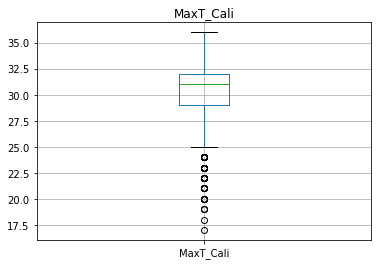

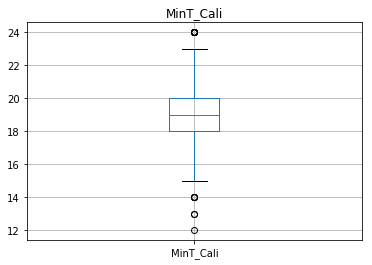

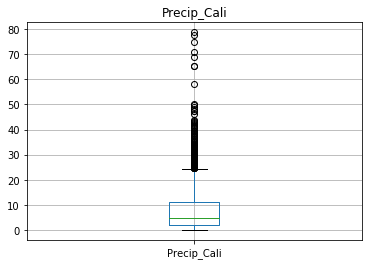

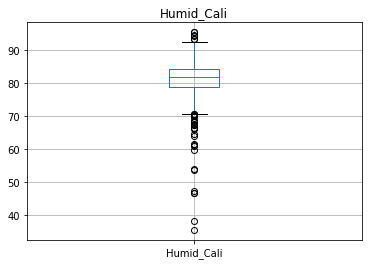

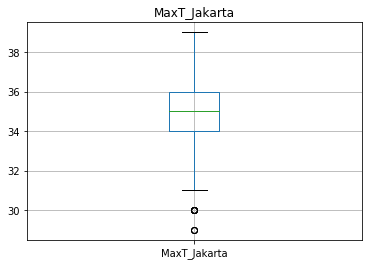

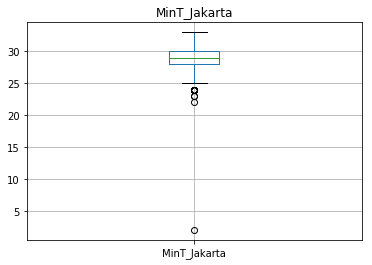

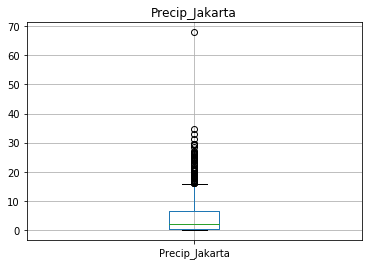

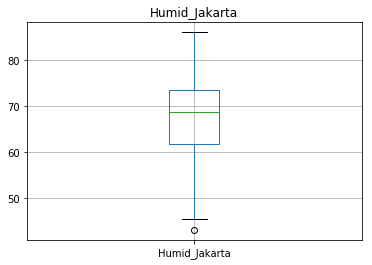

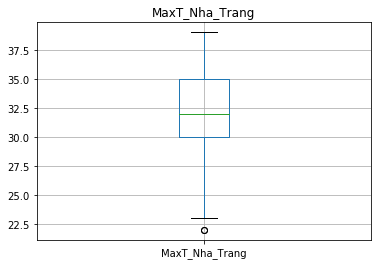

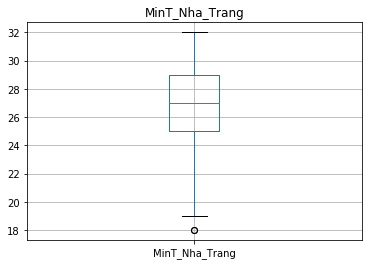

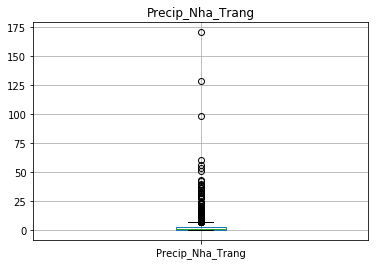

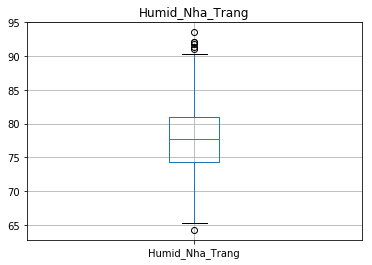

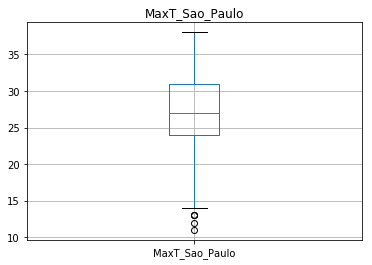

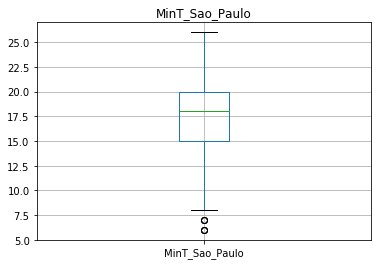

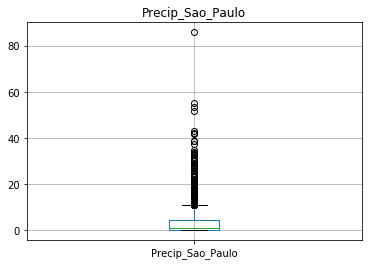

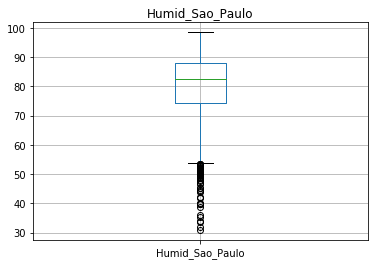

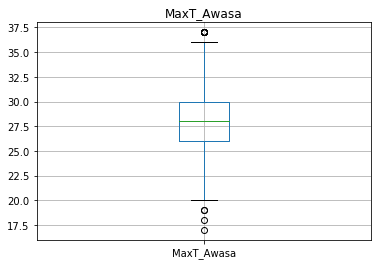

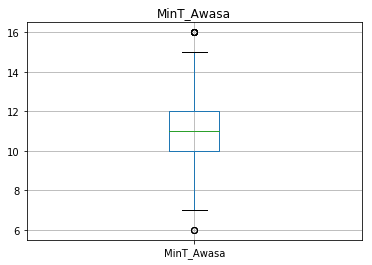

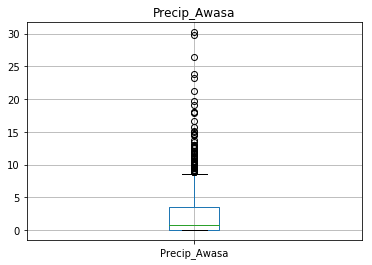

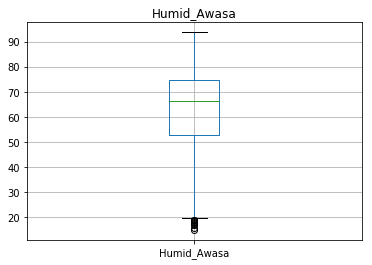

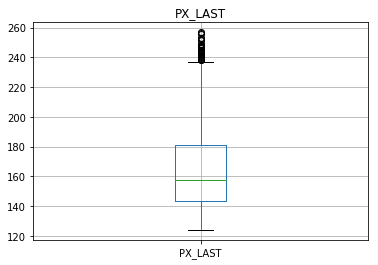

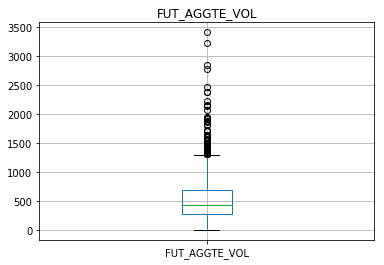

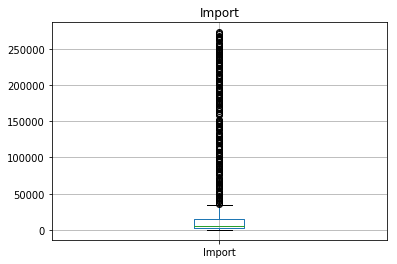

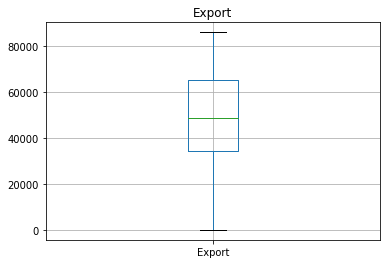

In [62]:
columns = Combined_DF.columns
index = Combined_DF.index
for i in range(len(columns)-5):
    Combined_DF.boxplot(columns[i])
    plt.title(columns[i])
    plt.show()

In [63]:
percentiles = {}
for i in range(len(columns)):
    p =np.percentile(Combined_DF[columns[i]],[5, 95])
    percentiles[columns[i]] = p
print(p)

[17523.44808743 81958.77038191]


In [64]:
Deoutlier_DF = pd.DataFrame(index=index, columns=columns)
Deoutlier_DF = Deoutlier_DF.fillna(0) # with 0s rather than NaNs
for key, value in percentiles.items():
    
    for i in index:
        if Combined_DF.loc[i,key] > value[1]:
            Deoutlier_DF.loc[i,key] = value[1]
            
        if Combined_DF.loc[i,key] < value[0]:
            #Deoutlier_DF.loc[i,key] = value[0]
            pass
        else:
            Deoutlier_DF.loc[i,key] = Combined_DF.loc[i,key]
            

In [65]:
Deoutlier_DF.head()

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,...,Humid_Awasa,PX_LAST,FUT_AGGTE_VOL,Import,Export,Production,Trade Balance,Import MY,Export MY,Production MY
2013-06-28,28.0,18.0,3.6,84.500,34.0,0.0,11.2,76.250,36.0,24.0,...,85.750,145.70,346.0,0.000000,26354.016393,34415.655738,25837.131148,25780.950820,56987.147541,69243.606557
2013-07-01,29.0,18.0,1.2,81.250,34.0,0.0,6.5,76.125,34.0,25.0,...,85.500,146.10,335.0,0.000000,27123.000000,35595.000000,26613.000000,25328.278689,56748.163934,68145.229508
2013-07-02,30.0,17.0,0.8,79.125,34.0,0.0,10.5,75.125,33.0,25.0,...,85.875,149.20,695.0,0.000000,27763.141304,35561.793478,27203.250000,25177.387978,56668.502732,67779.103825
2013-07-03,29.0,17.0,1.1,80.000,0.0,26.0,8.5,81.000,33.0,25.0,...,85.375,146.10,532.0,609.782609,28403.282609,35528.586957,27793.500000,25026.497268,56588.841530,67412.978142
2013-07-04,29.0,17.0,1.0,82.750,0.0,0.0,7.3,81.375,33.0,25.0,...,82.875,145.05,0.0,659.673913,29043.423913,35495.380435,28383.750000,24875.606557,56509.180328,67046.852459


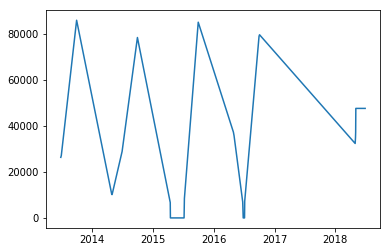

In [66]:
N=30
Deoutlier_DF.iloc[-40:,23] = np.ones((40)) * Deoutlier_DF.iloc[:-40,23].mean()
x = Deoutlier_DF.loc[:,'Export'] 
#y1 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(x)
plt.show()

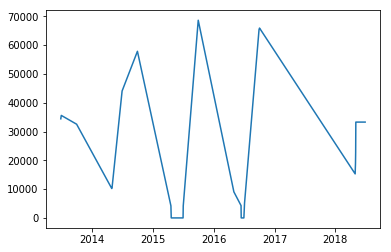

In [67]:
N=30
Deoutlier_DF.iloc[-40:,24] = np.ones((40)) * Deoutlier_DF.iloc[:-40,24].mean()
x = Deoutlier_DF.loc[:,'Production'] 
#y1 = np.convolve(x, np.ones((N,))/N, mode='same')

plt.plot(x)
plt.show()

In [68]:
features = np.ones(Deoutlier_DF.iloc[:,:-2].shape)
print(features)
#length = len(Combined_DF)
#features = np.empty(Combined_DF.iloc[:,0:3].shape)
for i in range(3,20):
    N=45
    x = Deoutlier_DF.iloc[:,i].values
    features[:,i] = np.convolve(x, np.ones((N,))/N, mode='same')
features[:,20] = Deoutlier_DF.loc[:,'Import'].values
features[:,21] = Deoutlier_DF.loc[:,'Export'].values
features[:,22] = Deoutlier_DF.loc[:,'Production'].values
features[:,23] = Deoutlier_DF.loc[:,'Trade Balance'].values
#features[:,23] = Deoutlier_DF.loc[:,'Import MY'].values
#features[:,24] = Deoutlier_DF.loc[:,'Export MY'].values
#features[:,25] = Deoutlier_DF.loc[:,'Production MY'].values
target = Combined_DF.loc[:, 'PX_LAST'].values

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [69]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
T = len(features_standardized)-365
FS_train, FS_test = features_standardized[:T,:], features_standardized[T:,:]
T_train, T_test = target[:T], target[T:]
FS_train = FS_train[:]
FS_test = FS_test[:]
T_train = T_train[:]
T_test = T_test[:]
regression1 = RidgeCV(alphas=[2.0,3.0,5.0,10.0])
regression2 = Lasso(alpha=1.8)
regression3 = HuberRegressor(epsilon=2, alpha=.5)
model1 = regression1.fit(FS_train, T_train)
model2 = regression2.fit(FS_train, T_train)
model3 = regression3.fit(FS_train, T_train)
model1.alpha_

2.0

In [70]:
print(model1.score(FS_train, T_train))
print(model2.score(FS_train, T_train))
print(model3.score(FS_train, T_train))
print(model1.score(FS_test, T_test))
print(model2.score(FS_test, T_test))
print(model3.score(FS_test, T_test))

0.882161834974312
0.6863029938295708
0.8779823461284886
-13.963366040609895
-0.5820511774473311
-11.32307054112507


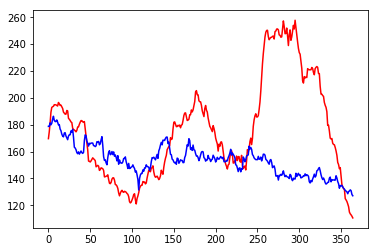

2087.619259459519
32.658471629614816


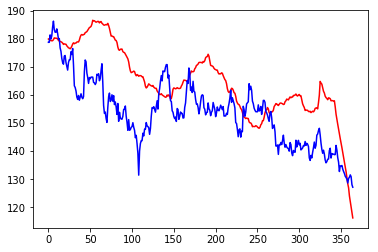

220.72042470432285
12.84175583549703


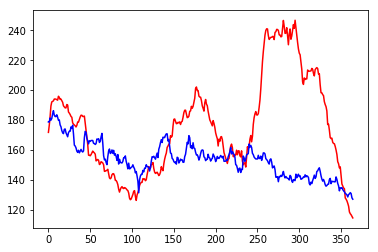

1719.2575071352308
29.57327614940305


In [71]:
pr1 = model1.predict(FS_test)
plt.plot(pr1, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr1)
error_A = mean_absolute_error(T_test, pr1)
print(error)
print(error_A)
pr2 = model2.predict(FS_test)
plt.plot(pr2, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr2)
error_A = mean_absolute_error(T_test, pr2)
print(error)
print(error_A)
pr3 = model3.predict(FS_test)
plt.plot(pr3, color='red')
plt.plot(T_test, color='blue')
plt.show()
error = mean_squared_error(T_test, pr3)
error_A = mean_absolute_error(T_test, pr3)
print(error)
print(error_A)

In [72]:
corr_matrix = Combined_DF.corr().abs()
corr_matrix

,MaxT_Cali,MinT_Cali,Precip_Cali,Humid_Cali,MaxT_Jakarta,MinT_Jakarta,Precip_Jakarta,Humid_Jakarta,MaxT_Nha_Trang,MinT_Nha_Trang,...,Humid_Awasa,PX_LAST,FUT_AGGTE_VOL,Import,Export,Production,Trade Balance,Import MY,Export MY,Production MY
MaxT_Cali,1.000000,0.260249,0.463119,0.047356,0.067249,0.029144,0.013990,0.407334,0.374295,0.174892,...,0.146846,0.200730,0.096582,0.197024,0.042202,0.113814,0.162760,0.269195,0.422079,0.426067
MinT_Cali,0.260249,1.000000,0.058009,0.289109,0.178062,0.167750,0.025436,0.046665,0.243196,0.206279,...,0.207916,0.083479,0.096879,0.077363,0.005049,0.074745,0.073505,0.021313,0.018144,0.059983
Precip_Cali,0.463119,0.058009,1.000000,0.132760,0.072001,0.149490,0.095185,0.372951,0.162226,0.010182,...,0.107633,0.161656,0.086638,0.037985,0.041104,0.059319,0.081292,0.162247,0.223777,0.234300
Humid_Cali,0.047356,0.289109,0.132760,1.000000,0.059051,0.091513,0.029262,0.275533,0.197359,0.174230,...,0.091785,0.054989,0.037250,0.118386,0.067735,0.080013,0.148122,0.166081,0.223488,0.295381
MaxT_Jakarta,0.067249,0.178062,0.072001,0.059051,1.000000,0.387704,0.246160,0.437497,0.344200,0.446248,...,0.204178,0.001429,0.031817,0.259627,0.158691,0.194618,0.217976,0.036260,0.067262,0.052526
MinT_Jakarta,0.029144,0.167750,0.149490,0.091513,0.387704,1.000000,0.061616,0.412187,0.010647,0.279359,...,0.193540,0.162358,0.164550,0.361947,0.186323,0.121866,0.315430,0.166929,0.160681,0.186161
Precip_Jakarta,0.013990,0.025436,0.095185,0.029262,0.246160,0.061616,1.000000,0.376712,0.184696,0.267294,...,0.067620,0.133595,0.034080,0.133136,0.025504,0.087905,0.143013,0.088204,0.055661,0.121063
Humid_Jakarta,0.407334,0.046665,0.372951,0.275533,0.437497,0.412187,0.376712,1.000000,0.187708,0.161790,...,0.229554,0.358273,0.236314,0.317224,0.160261,0.146843,0.297255,0.098877,0.180191,0.254173
MaxT_Nha_Trang,0.374295,0.243196,0.162226,0.197359,0.344200,0.010647,0.184696,0.187708,1.000000,0.782456,...,0.648526,0.158896,0.131955,0.052502,0.136502,0.062724,0.109453,0.234725,0.060153,0.111987
MinT_Nha_Trang,0.174892,0.206279,0.010182,0.174230,0.446248,0.279359,0.267294,0.161790,0.782456,1.000000,...,0.465255,0.050117,0.037672,0.168622,0.138080,0.032963,0.245126,0.271334,0.156105,0.203023


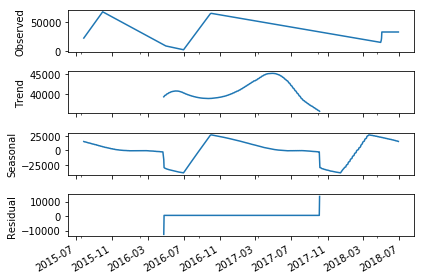

(730,)


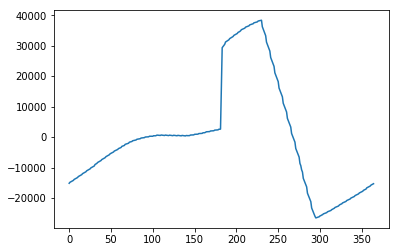

In [73]:
result12 = seasonal_decompose(Combined_DF.iloc[-730:,24], freq=365, model='additive')
result12.plot()
plt.show()
seasonal_production = result12.seasonal.values

print(seasonal_production.shape)
plt.plot(-seasonal_production[-365:])
plt.show()

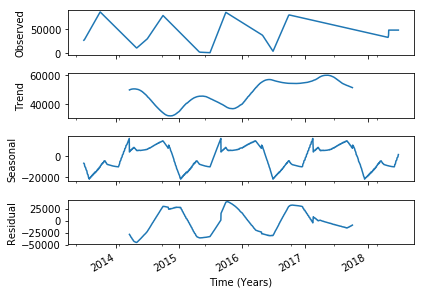

(1251,)


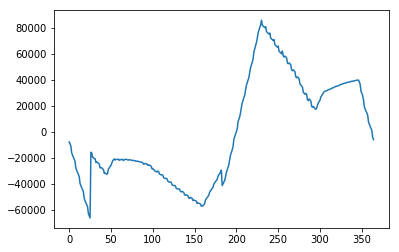

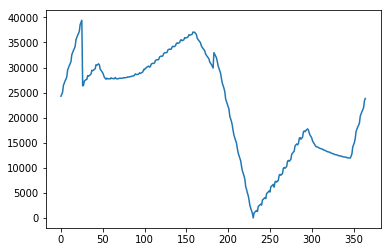

In [77]:
result12 = seasonal_decompose(Combined_DF.iloc[:,23], freq=365, model='additive')
result12.plot()
plt.xlabel('Time (Years)')
plt.savefig('seasonal_decomp.png')
plt.show()
seasonal_export = result12.seasonal.values

print(seasonal_export.shape)
plt.plot((-seasonal_export[-365:]/max(-seasonal_export[-365:]))*Combined_DF.iloc[:,23].max())

plt.show()
plt.plot(seasonal_export[-365:] + np.abs(min(seasonal_export[-365:])))
plt.show()